# Creating nice figures with `pyvista` and `matplotlib`
In this tutorial, we use `pyvista` to create contour plots and then use `matplotlib` subplots to arrange the contour plots nicely with subfigure labels and a `nice' colorbar, which with the appropriate backend could be rendered in latex.

In [6]:
import pyvista as pv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
fn = 'case/postprocessing/RESULTS_FLUID_DOMAIN.case'

reader = pv.get_reader(fn)
reader.set_active_time_value(300)

data = reader.read()['Fluid domain']

data.cell_data


pyvista DataSetAttributes
Association     : CELL
Active Scalars  : mpi_rank_id
Active Vectors  : Velocity
Active Texture  : None
Active Normals  : None
Contains arrays :
    mpi_rank_id             float32    (3140920,)           SCALARS
    Velocity                float32    (3140920, 3)         VECTORS
    Pressure                float32    (3140920,)
    TurbVisc                float32    (3140920,)
    CourantNb               float32    (3140920,)
    FourierNb               float32    (3140920,)
    total_pressure          float32    (3140920,)
    U_mean                  float32    (3140920, 3)
    UU_mean                 float32    (3140920, 6)
    P_mean                  float32    (3140920,)

In [7]:
# Create off_screen slic plots and output them as an (N, M, 4) 
# RGBA array

plane = data.ctp().slice(normal='x',origin=(0,0,0))

p1 = pv.Plotter(window_size=(1000,200), off_screen=True)
p1.add_mesh(plane,
            scalars='Velocity',
            cmap='bwr',
           clim=(0,1.5),
           show_scalar_bar=False)
p1.view_zy()
p1.camera.zoom(4.5)
im1 = p1.screenshot(transparent_background=True)

p2 = pv.Plotter(window_size=(1000,200), off_screen=True)

p2.add_mesh(plane,
            scalars='U_mean',
            cmap='bwr',
            clim=(0,1.5),
           show_scalar_bar=False)

p2.view_zy()
p2.camera.zoom(4.5)
im2 = p2.screenshot(transparent_background=True)


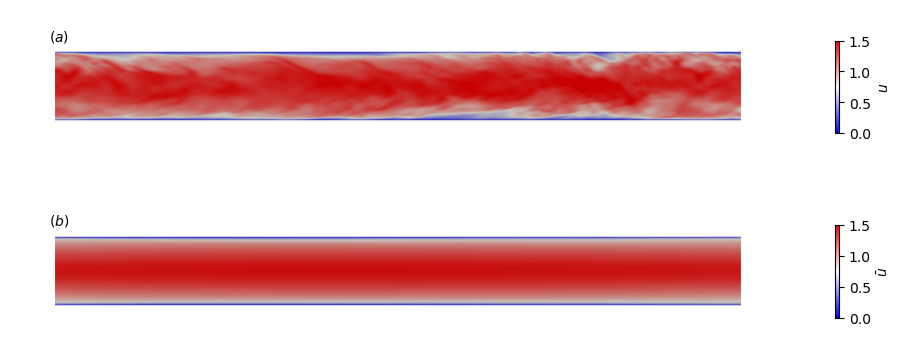

In [8]:
# Create subsplots layout
fig, ax = plt.subplots(2, figsize=(10,4))

# Plot RGBA array
ax[0].imshow(im1)
ax[1].imshow(im2)

# Remove ticks and splines from subplots
for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    a.spines[['left','right','bottom','top']].set_visible(False)

# Add subplot labels
ax[0].text(0.05,0.8,r"$(a)$", transform=ax[0].transAxes)
ax[1].text(0.05,0.8,r"$(b)$", transform=ax[1].transAxes)

# Creating colorbar with manually created ScalarMappable
norm = Normalize(0,1.5)
qm = ScalarMappable(norm=norm,cmap='bwr')

# plot colorbar
cax1 = fig.colorbar(qm, ax=ax[0], shrink=0.5)
cax2 = fig.colorbar(qm, ax=ax[1], shrink=0.5)

cax1.ax.set_ylabel(r"$u$")
cax2.ax.set_ylabel(r"$\bar{u}$")

#Show!
fig.tight_layout()
plt.show()